# About Dataset
link  https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset


Dataset Description
This dataset contains 30,000 records and 20 features related to individuals’ health conditions, along with some noisy/random columns.

Key Highlights
Suitable for health classification tasks (e.g., predicting diabetes, hypertension, obesity)

Useful for predictive modeling (e.g., predicting hospital stay length or risk factors)

Includes missing values and noise features to practice data cleaning & preprocessing

## Imports

In [17]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
# Download latest version
path = kagglehub.dataset_download("abdallaahmed77/healthcare-risk-factors-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'healthcare-risk-factors-dataset' dataset.
Path to dataset files: /kaggle/input/healthcare-risk-factors-dataset


In [3]:
print(os.listdir(path))

['dirty_v3_path.csv']


In [4]:
df = pd.read_csv(os.path.join(path, 'dirty_v3_path.csv'))

## Explore the data

In [5]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [6]:
df.isnull().sum().sum()

np.int64(22500)

In [7]:
df.shape

(30000, 20)

In [8]:
df = df.dropna()

In [9]:
df.shape

(13355, 20)

In [10]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
5,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35,ipsum,108.411983
9,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41,lorem,-45.916696


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13355 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                13355 non-null  float64
 1   Gender             13355 non-null  object 
 2   Medical Condition  13355 non-null  object 
 3   Glucose            13355 non-null  float64
 4   Blood Pressure     13355 non-null  float64
 5   BMI                13355 non-null  float64
 6   Oxygen Saturation  13355 non-null  float64
 7   LengthOfStay       13355 non-null  int64  
 8   Cholesterol        13355 non-null  float64
 9   Triglycerides      13355 non-null  float64
 10  HbA1c              13355 non-null  float64
 11  Smoking            13355 non-null  int64  
 12  Alcohol            13355 non-null  int64  
 13  Physical Activity  13355 non-null  float64
 14  Diet Score         13355 non-null  float64
 15  Family History     13355 non-null  int64  
 16  Stress Level       13355 no

## Visualization

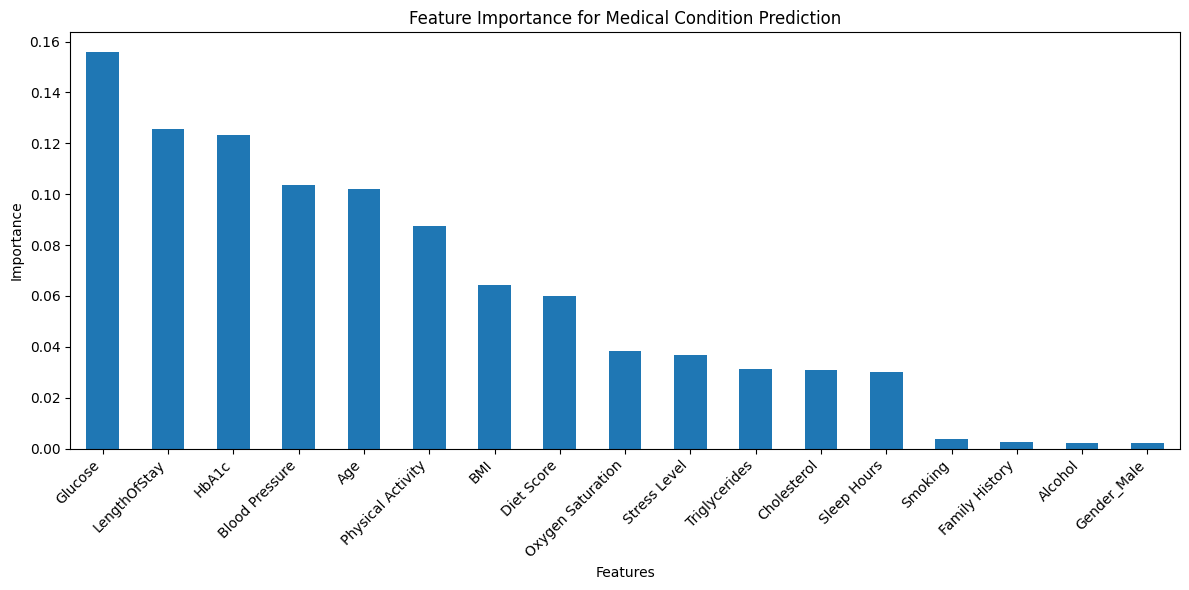

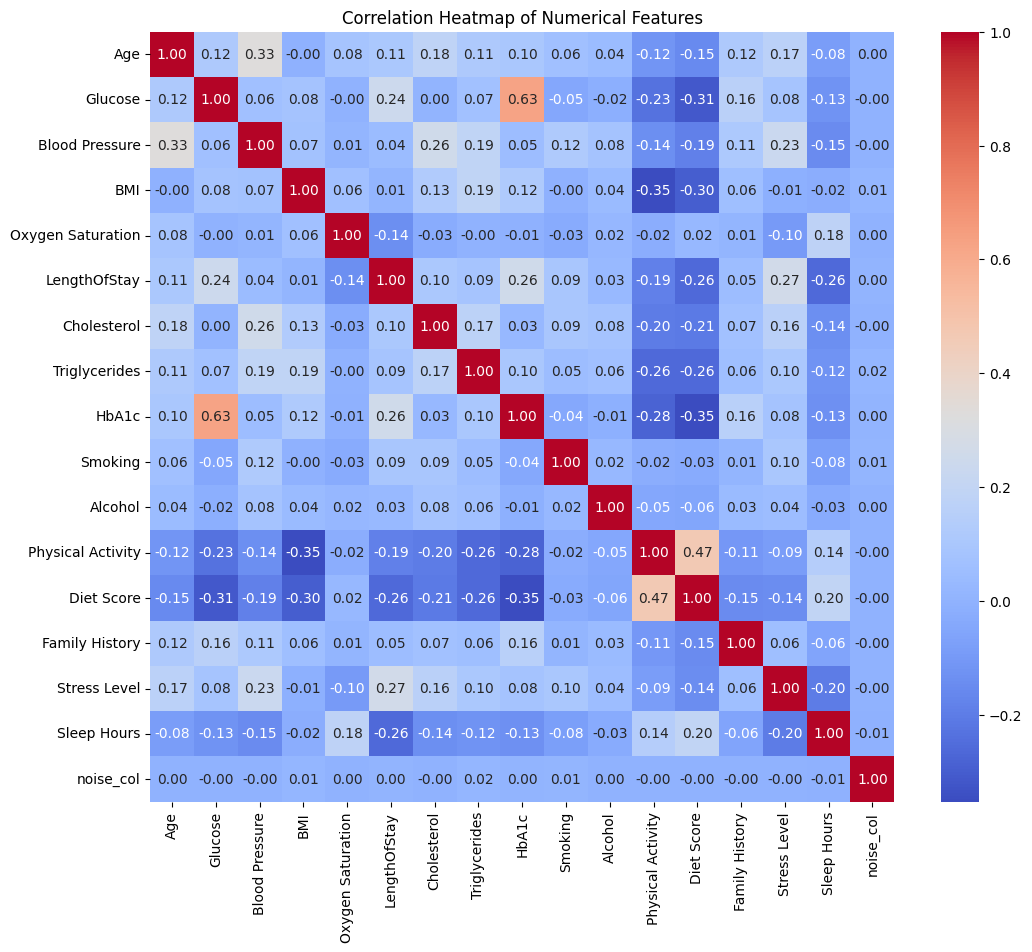

In [14]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Preprocessing

In [15]:
df["Medical Condition"].value_counts()

,count
Medical Condition,
Hypertension,3748
Diabetes,3396
Obesity,2017
Healthy,1602
Asthma,1061
Arthritis,921
Cancer,610


In [18]:
# Encode categorical columns
cat_cols = ['Gender', 'Medical Condition', 'Smoking', 'Alcohol', 'Physical Activity', 'Diet Score', 'Family History']
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [20]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,1,3,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,1,4,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
4,66.0,0,5,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
5,50.0,1,5,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35,ipsum,108.411983
9,13.0,0,1,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41,lorem,-45.916696


In [21]:
df = df.drop(columns=['random_notes'])

## Train-Test Split & Scaling

In [22]:
X = df.drop('Medical Condition', axis=1)
y = df['Medical Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training (Base + Ensemble)

In [23]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Voting
voting = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

# Stacking
stacking = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=GradientBoostingClassifier(),
    passthrough=True
)

models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Voting': voting, 'Stacking': stacking}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test),
        f1_score(y_train, y_pred_train, average='weighted'),
        f1_score(y_test, y_pred_test, average='weighted')
    ])

results_df = pd.DataFrame(results, columns=['Model', 'Train_Acc', 'Test_Acc', 'Train_F1', 'Test_F1'])
results_df


,Model,Train_Acc,Test_Acc,Train_F1,Test_F1
0,Random Forest,1.000000,0.935230,1.000000,0.934212
1,Gradient Boosting,0.967802,0.937477,0.967577,0.936838
2,Voting,0.992793,0.938600,0.992762,0.937785
3,Stacking,0.985399,0.938225,0.985366,0.938036


## Confusion Matrix and Report

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       184
           1       0.97      0.91      0.94       212
           2       0.98      0.98      0.98       122
           3       0.98      0.96      0.97       679
           4       0.97      1.00      0.98       320
           5       0.89      0.95      0.92       750
           6       0.93      0.93      0.93       404

    accuracy                           0.94      2671
   macro avg       0.94      0.92      0.93      2671
weighted avg       0.94      0.94      0.93      2671



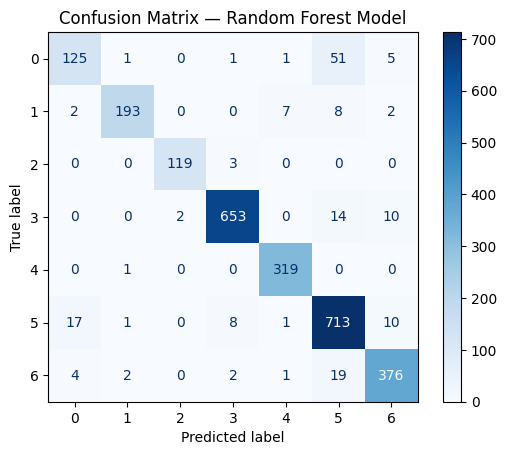

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix — Random Forest Model")
plt.show()